# FacePointX - Facial keypoints detector

### Dependencies

In [12]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [4]:
train_csv_filepath = os.path.join("Data","training.csv")
train_df = pd.read_csv(train_csv_filepath)
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
print(train_df.isnull().sum())
# train_df.fillna(train_df.mean(),inplace = True)
# train_df.head()
# train_df.dropna(how = "all",inplace = True)

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [6]:
train_df["Image"] = train_df["Image"].apply(lambda x: np.fromstring(x, sep = " ").reshape(96,96,1))

In [7]:
X_imgs = np.stack(train_df["Image"].values) / 255.0
y = train_df.drop(columns = ["Image"]).values

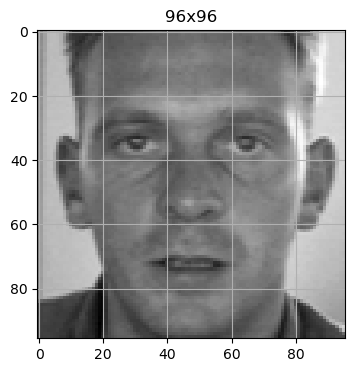

In [8]:
plt.figure(figsize=(4, 4))
plt.imshow(X_imgs[2], cmap="gray")
plt.title("96x96")
plt.grid(True)
plt.show()

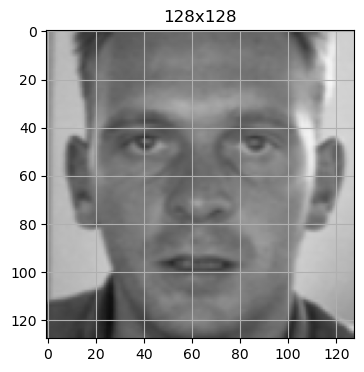

In [23]:
X_resized = np.array([cv2.resize(img, (128, 128)) for img in X_imgs])
X_resized = X_resized[..., np.newaxis]
X_resized = np.repeat(X_resized, 3, axis=-1)

plt.figure(figsize=(4, 4))
plt.imshow(X_resized[2])
plt.title("128x128")
plt.grid(True)
plt.show()

In [24]:
def Feature_Extraction(image):
    base = MobileNetV2(weights = "imagenet",include_top = False,input_shape = (128,128,3))
    out = GlobalAveragePooling2D()(base.output)
    model = Model(inputs = base.input,outputs = out)
    features = model.predict(image)
    return features

In [27]:
X_train_features = Feature_Extraction(X_resized)
print(X_train_features)

221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step
[[0.         0.         0.08430126 ... 0.5940291  0.4827765  0.        ]
 [0.10603178 0.         0.24210255 ... 1.3498011  0.25151008 0.        ]
 [0.5684568  0.         0.         ... 0.08170809 0.         0.        ]
 ...
 [0.5672833  0.         0.         ... 1.5709791  0.08462833 0.        ]
 [0.         0.         0.5640938  ... 0.5171533  0.24601759 0.        ]
 [0.02519675 0.         0.03052031 ... 3.0076256  3.147127   0.        ]]
